# PyROOT example

This pyROOT example was written by Dr. Shawfeng Dong. It is based upon the [ATLAS tutorial example for SLAC Tier3](https://usatlas.github.io/tier3docs/Tutorial-2019Aug/SLAC/), which was originally written in C++ by Shuwei Ye of BNL. [Trying out this example requires a python 2 kernel with PyROOT support, and with a ATLAS analysis release loaded](https://usatlas.github.io/tier3docs/jupyter/SLACjupyter.html).

In [1]:
# Set up ROOT and RootCore
import ROOT

Welcome to JupyROOT 6.16/00


In [2]:
# Initialize the xAOD infrastructure
ROOT.xAOD.Init()

<ROOT.xAOD::TReturnCode object at 0x7ab6960>

xAOD::Init                INFO    Environment initialised for data access


In [3]:
# Set up the input files
fileName = "root://atlrdr1//xrootd/atlas/atlaslocalgroupdisk/rucio/data16_13TeV/f9/bd/DAOD_SUSY15.11525262._000003.pool.root.1"
treeName = "CollectionTree"
f = ROOT.TFile.Open(fileName)

In [4]:
# Make the "transient tree"
t = ROOT.xAOD.MakeTransientTree(f, treeName)

xAOD::MakeTransientTree   INFO    Created transient tree "CollectionTree" in ROOT's common memory


In [5]:
# Open TFile to store the analysis histogram output
fout = ROOT.TFile("pyROOTOutputFile.root", "recreate")

# Make histograms for storage
h_njets_raw = ROOT.TH1D("h_njets_raw", "", 20, 0, 20)
h_mjj_raw = ROOT.TH1D("h_mjj_raw", "", 100, 0, 500)

In [ ]:
# Print some information
print(f"Number of input events: {t.GetEntries()}")

In [ ]:
for entry in xrange(t.GetEntries()):
    t.GetEntry(entry)
    if entry % 100 == 0:
        s = f"Processing entry #{entry + 1}, run #{t.EventInfo.runNumber()}, event #{t.EventInfo.eventNumber()}"
        print(s)

    jets_raw = []
    for jet in t.AntiKt4EMTopoJets:
        if entry % 100 == 0:
            s = f"Jet : {jet.pt()} {jet.eta()} {jet.phi()} {jet.m()}"
            print(s)
        jets_raw.append(jet)

    # Fill the analysis histograms accordingly
    h_njets_raw.Fill(len(jets_raw))

    if len(jets_raw) >= 2:
        h_mjj_raw.Fill((jets_raw[0].p4() + jets_raw[1].p4()).M() / 1000.0)

In [8]:
# Save the output file
fout.Write()
fout.Close()

In [9]:
# Read the output file
fout = ROOT.TFile("pyROOTOutputFile.root", "read")
h_mjj_raw = fout.Get("h_mjj_raw")

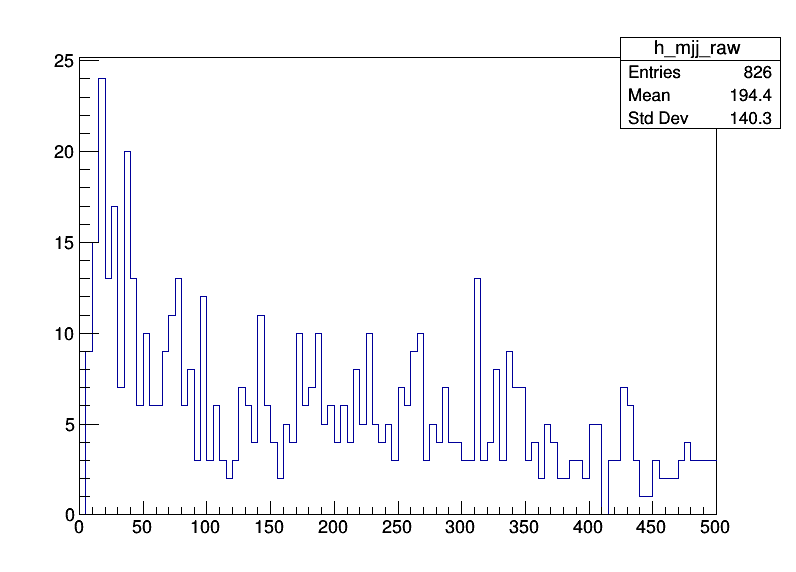

In [10]:
# Display the histogram
# %jsroot on
c = ROOT.TCanvas("Canvas 1", "Canvas 1", 800, 600)
h_mjj_raw.Draw()
c.Draw()

In [11]:
fout.Close()